In [1]:
!pip install mplfinance


     |████████████████████████████████| 70 kB 4.6 MB/s 


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates

#Loading of data

In [4]:
df = pd.read_csv("ETH-USD.csv",parse_dates=True)


In [5]:
df = df.drop(columns=['Adj Close'])


In [51]:
df.isnull().sum()


Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [52]:
df.dropna(inplace=True)


#Data exploration - Ethereum trend

In [6]:
df.describe()


,Open,High,Low,Close,Volume
count,2208.000000,2208.000000,2208.000000,2208.000000,2.208000e+03
mean,433.578981,450.619491,414.840862,434.914512,7.348590e+09
std,683.498443,713.295560,650.311554,685.738356,1.075435e+10
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05
25%,14.167250,14.561175,13.567750,14.260150,4.256840e+07
50%,203.964431,210.450729,196.916908,203.912002,2.290465e+09
75%,408.495575,418.961944,394.578835,409.866516,1.029495e+10
max,4174.635742,4362.350586,3785.848633,4168.701172,8.448291e+10


In [8]:
df['100ma'] = df['Close'].rolling(window = 100, min_periods = 0).mean()
df

,Date,Open,High,Low,Close,Volume,100ma
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,1.643290e+05,2.772120
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,6.741880e+05,1.762723
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,5.321700e+05,1.409114
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,4.052830e+05,1.233947
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.463100e+06,1.200730
...,...,...,...,...,...,...,...
2207,2021-08-22,3226.227295,3272.733154,3142.007080,3242.115479,1.598328e+10,2497.191824
2208,2021-08-23,3241.357422,3373.384277,3235.851318,3319.257324,2.051111e+10,2494.003176
2209,2021-08-24,3324.855469,3358.688232,3154.121338,3172.456299,2.013103e+10,2489.852678
2210,2021-08-25,3174.269775,3248.727295,3086.114990,3224.915283,1.890273e+10,2489.277854


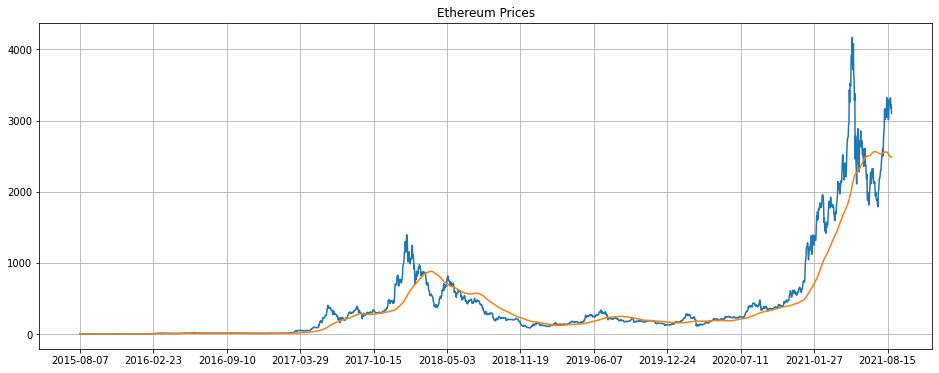

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Close)
ax.plot(df.Date, df['100ma'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Ethereum Prices')
plt.grid()
plt.show()

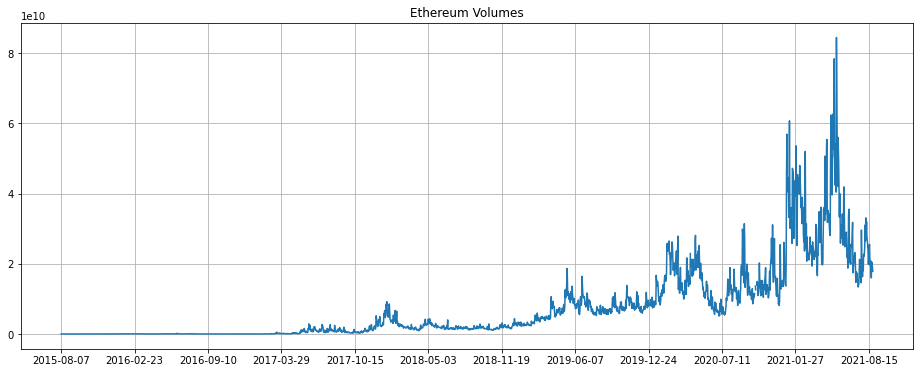

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Volume)
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Ethereum Volumes')
plt.grid()
plt.show()

In [11]:
df['Total Traded'] = df['Open']*df['Volume']


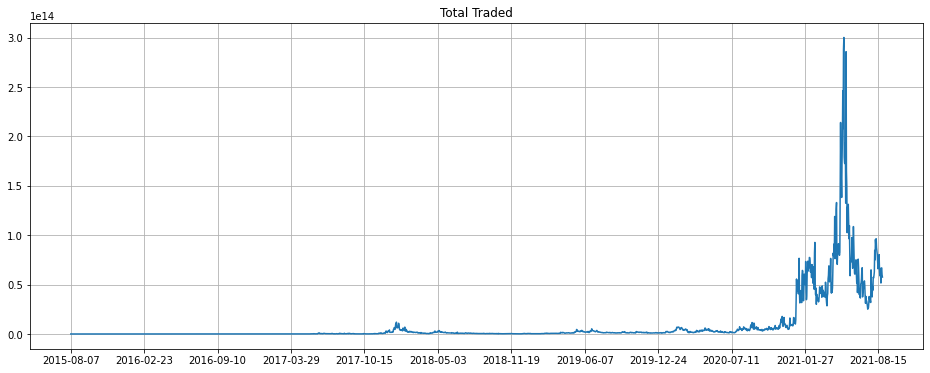

In [12]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['Total Traded'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Total Traded')
plt.grid()
plt.show()

In [13]:
df.iloc[df['Total Traded'].argmax()]


Date                     2021-05-13
Open                    3828.918457
High                    4032.563477
Low                     3549.407227
Close                   3715.148438
Volume                78398214539.0
100ma                   2140.178688
Total Traded    300180370644222.875
Name: 2106, dtype: object

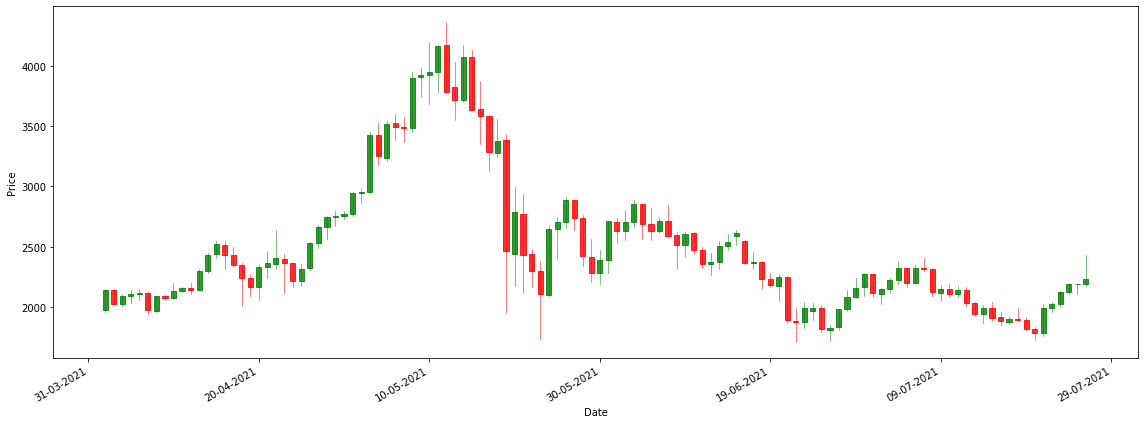

In [14]:
ohlc = df[(df['Date'] > '2021-04-01') & (df['Date'] <= '2021-07-26')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)
fig, ax = plt.subplots(figsize = (16,6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()


In [70]:
df["returns"] = (df["Close"]/df["Close"].shift(1)) - 1


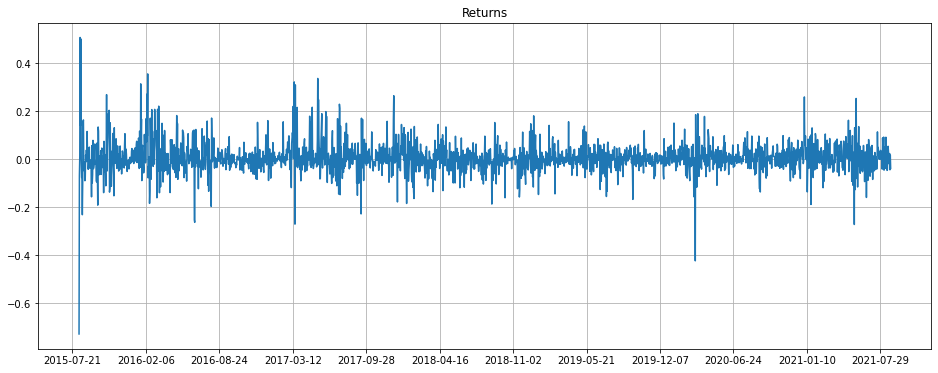

In [71]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['returns'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Returns')
plt.grid()
plt.show()


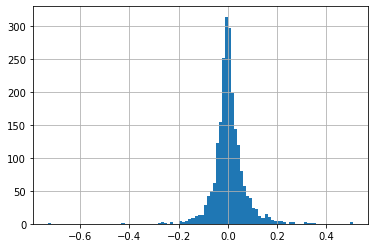

In [17]:
df["returns"].hist(bins=100)


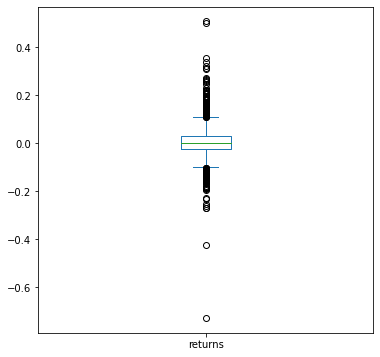

In [18]:
df["returns"].plot(kind = "box", figsize = (6,6))


In [19]:
df["Cumulative Return"] = (1 + df["returns"]).cumprod()


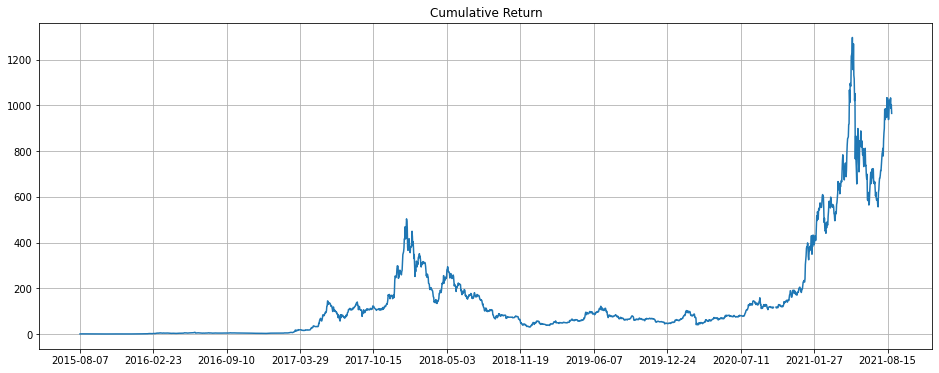

In [20]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['Cumulative Return'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Cumulative Return')
plt.grid()
plt.show()

In [21]:
df.iloc[df['Cumulative Return'].argmax()]


Date                            2021-05-11
Open                           3948.271973
High                           4178.208984
Low                            3783.889404
Close                          4168.701172
Volume                       52679737865.0
100ma                           2094.01106
Total Traded         207993932557366.34375
returns                           0.054755
Cumulative Return               1297.20723
Name: 2104, dtype: object

In [54]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

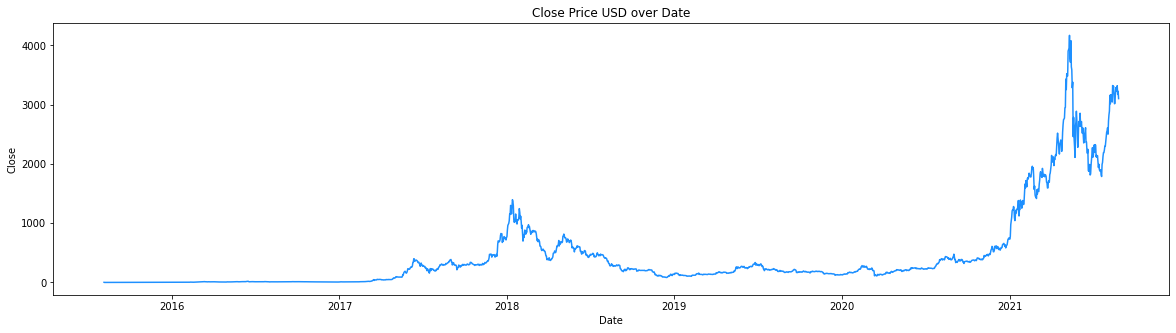

In [56]:
tmp_df = df.groupby(["Date"])["Close"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df, x="Date", y="Close", color="dodgerblue")
plt.title('Close Price USD over Date')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


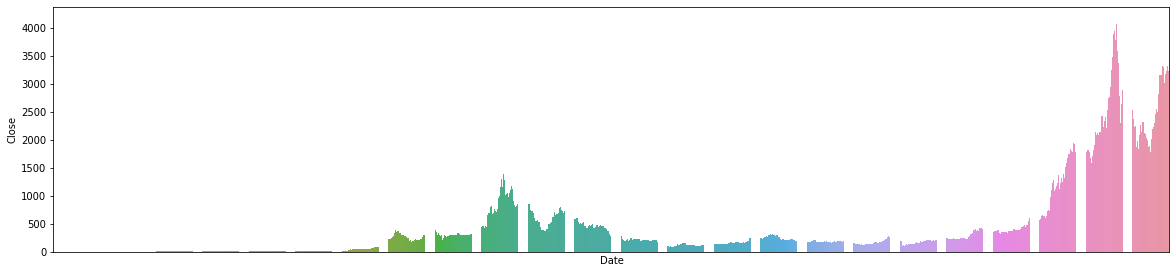

In [57]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,5))
sns.barplot(tmp_df['Date'], tmp_df['Close'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate() 
plt.show()

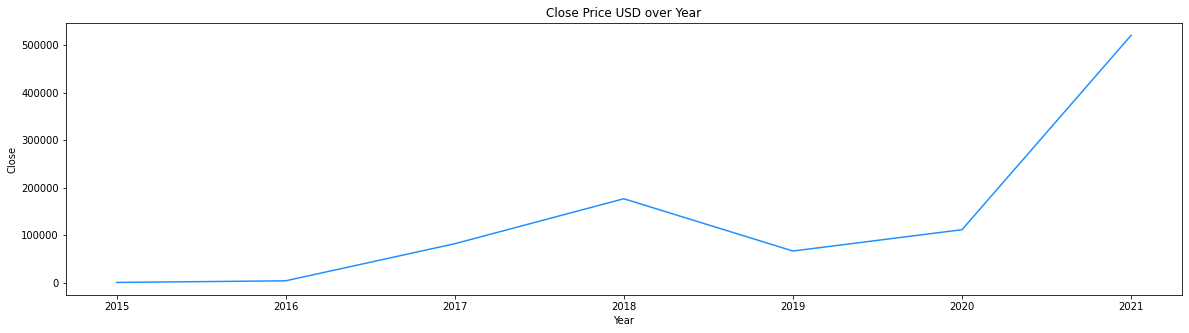

In [59]:
tmp_df = df.groupby(["Year"])["Close"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df, x="Year", y="Close", color="dodgerblue")
plt.title('Close Price USD over Year')
plt.show()

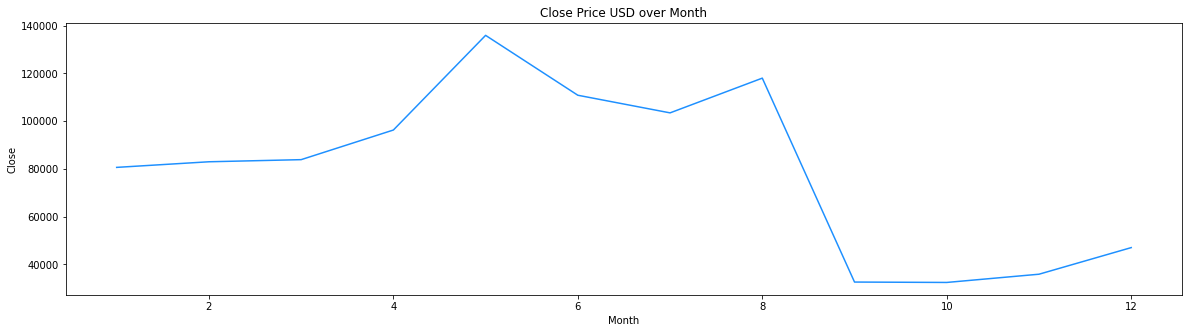

In [61]:
tmp_df = df.groupby(["Month"])["Close"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df, x="Month", y="Close", color="dodgerblue")
plt.title('Close Price USD over Month')
plt.show()

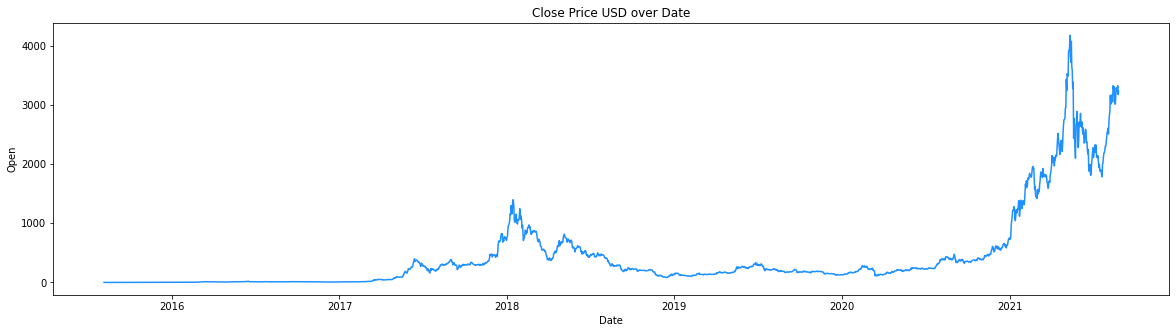

In [63]:
tmp_df = df.groupby(["Date"])["Open"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df, x="Date", y="Open", color="dodgerblue")
plt.title('Close Price USD over Date')
plt.show()

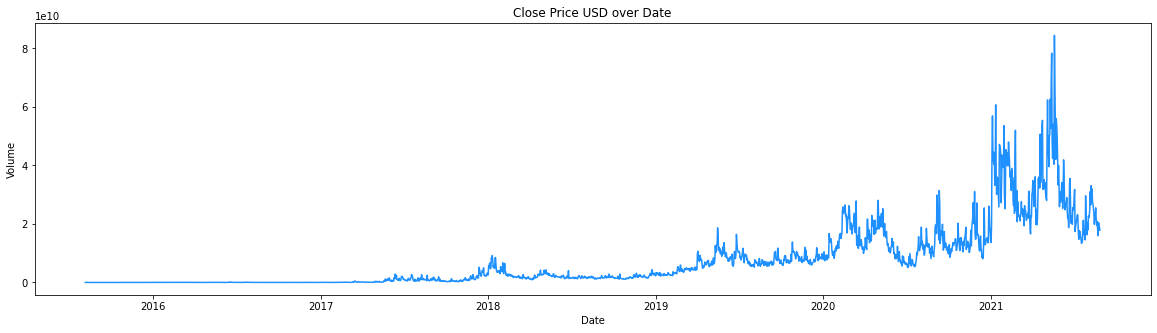

In [65]:
tmp_df = df.groupby(["Date"])["Volume"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df, x="Date", y="Volume", color="dodgerblue")
plt.title('Close Price USD over Date')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


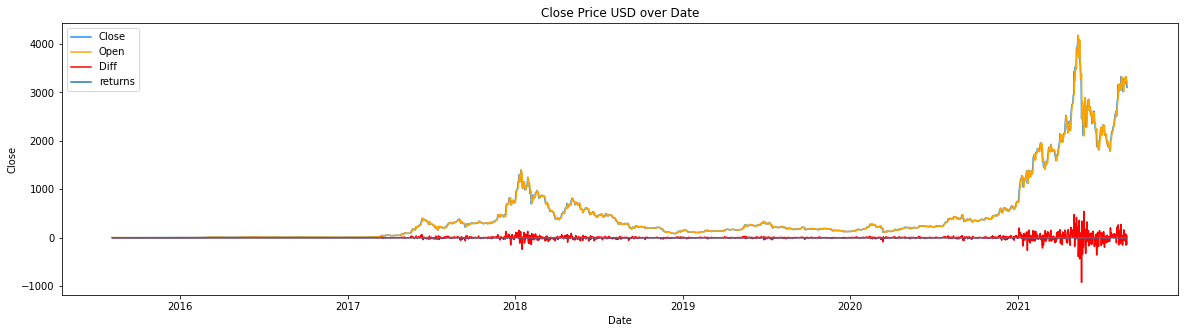

In [73]:
tmp_df = df.groupby(["Date"])["Open","Close", "Volume", "returns"].sum().reset_index()
tmp_df["Volume"] = np.log(tmp_df["Volume"])
tmp_df["Diff"] = tmp_df["Close"] - tmp_df["Open"] 

plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df, x="Date", y="Close", color="dodgerblue", label="Close")
sns.lineplot(data=tmp_df, x="Date", y="Open", color="orange", label="Open")
sns.lineplot(data=tmp_df, x="Date", y="Diff", color="red", label="Diff")
sns.lineplot(data=tmp_df, x="Date", y="returns", label="returns")
plt.title('Close Price USD over Date')
plt.legend()
plt.show()

In [74]:
dataset_df = df[["Date", "Close", "Volume", "Year", "Month", "Day"]]


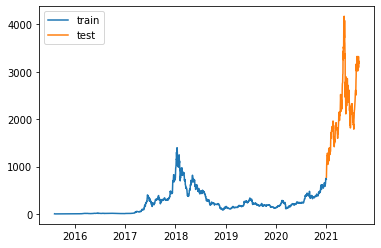

In [75]:
train_df = dataset_df[dataset_df['Date'] <= '2021'][['Close', 'Date']].set_index('Date')
test_df = dataset_df[dataset_df['Date'] > '2021'][['Close', 'Date']].set_index('Date')
plt.plot(train_df)
plt.plot(test_df)
plt.legend(['train', 'test'])

In [76]:
dataset_df.drop(["Date"], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
TEST_PERCENT = len(test_df)/len(dataset_df)
TEST_PERCENT


0.10733695652173914

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset_df)

In [79]:
train_len = int(len(dataset) * (1-TEST_PERCENT))
test_len = len(dataset) - train_len

In [80]:
train = dataset[0:train_len]
train

array([[5.60734561e-04, 7.36256281e-07, 0.00000000e+00, 6.36363636e-01,
        2.00000000e-01],
       [7.64097046e-05, 6.77131828e-06, 0.00000000e+00, 6.36363636e-01,
        2.33333333e-01],
       [6.40717214e-05, 5.09028993e-06, 0.00000000e+00, 6.36363636e-01,
        2.66666667e-01],
       ...,
       [1.80215002e-01, 2.04709952e-01, 8.33333333e-01, 1.00000000e+00,
        9.66666667e-01],
       [1.76900542e-01, 1.64847081e-01, 8.33333333e-01, 1.00000000e+00,
        1.00000000e+00],
       [1.75116623e-01, 1.61593845e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [81]:
test = dataset[len(train):]
test

array([[0.18571274, 0.23366492, 1.        , 0.        , 0.03333333],
       [0.23392768, 0.53502435, 1.        , 0.        , 0.06666667],
       [0.2494558 , 0.6740529 , 1.        , 0.        , 0.1       ],
       ...,
       [0.76099299, 0.23828429, 1.        , 0.63636364, 0.76666667],
       [0.77357831, 0.22374523, 1.        , 0.63636364, 0.8       ],
       [0.7439945 , 0.21116432, 1.        , 0.63636364, 0.83333333]])

In [82]:
def split_sequence(sequence, n_steps_in, n_steps_out):
    data_x, data_y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
  
        if out_end_ix > len(sequence):
            break
        
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        data_x.append(seq_x[:,1:])
        data_y.append(seq_y[:,0])
    return np.array(data_x), np.array(data_y)

In [83]:
n_steps_in, n_steps_out = 180, 1
n_features = 4

X_train, y_train = split_sequence(train, n_steps_in, n_steps_out)
X_test, y_test = split_sequence(test, n_steps_in, n_steps_out)

In [ ]:
!pip install livelossplot


In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKerasTF

In [86]:
model_wieght_file = "best_model.hdf5"

lr_reduce = ReduceLROnPlateau(monitor="val_loss", factor=0, min_delta=0.001, patience=1, verbose=1)

checkpoint = ModelCheckpoint(model_wieght_file, monitor="val_loss", verbose=1, save_best_only=True, mode="min")

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

callbacks = [PlotLossesKerasTF(), es, checkpoint]


In [87]:
model = Sequential()

model.add(LSTM(256 , input_shape = (n_steps_in , n_features) , return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 180, 256)          267264    
                                                                 
 dropout_2 (Dropout)         (None, 180, 256)          0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 809,089
Trainable params: 809,089
Non-tr

In [88]:
model.compile(loss="mean_squared_error", 
              optimizer=Adam(lr=0.0005), 
              metrics=["mean_squared_error"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


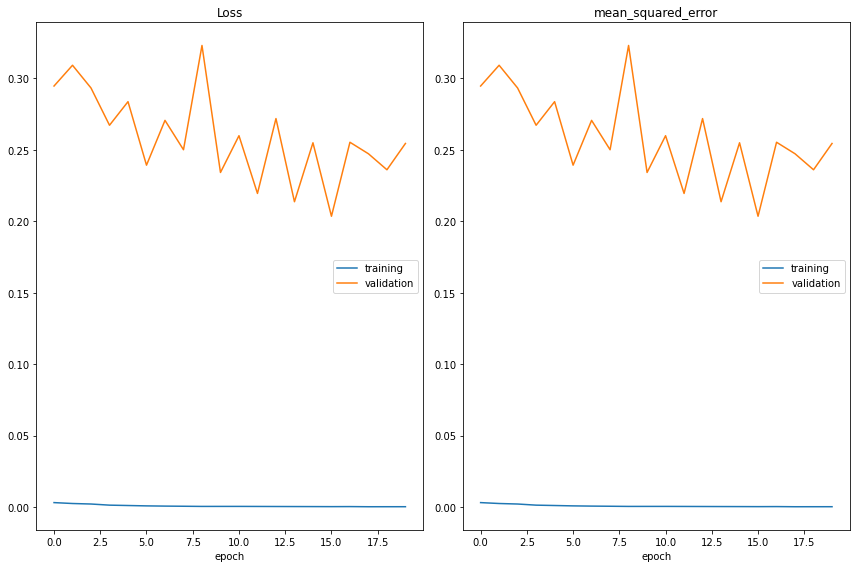

Loss
	training         	 (min:    0.000, max:    0.003, cur:    0.000)
	validation       	 (min:    0.204, max:    0.323, cur:    0.255)
mean_squared_error
	training         	 (min:    0.000, max:    0.003, cur:    0.000)
	validation       	 (min:    0.204, max:    0.323, cur:    0.255)

Epoch 00020: val_loss did not improve from 0.20358
112/112 [==============================] - 106s 945ms/step - loss: 2.6685e-04 - mean_squared_error: 2.6685e-04 - val_loss: 0.2545 - val_mean_squared_error: 0.2545


In [89]:
EPOCHS = 20
BATCH_SIZE = 16

history = model.fit(X_train, 
                    y_train, 
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks = callbacks, 
                    validation_data = (X_test,y_test))

In [90]:
import math

def model_score(model, X_train, y_train, X_test, y_test):
    train_score = model.evaluate(X_train, y_train, verbose=1)
    print("Train score: %0.5f MSE(%.2f RMSE)" % (train_score[0], math.sqrt(train_score[0])))
    
    test_score = model.evaluate(X_test, y_test, verbose=1)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (test_score[0], math.sqrt(test_score[0])))

In [91]:
model_score(model, X_train, y_train, X_test, y_test)


56/56 [==============================] - 28s 497ms/step - loss: 2.3819e-04 - mean_squared_error: 2.3819e-04
Train score: 0.00024 MSE(0.02 RMSE)
2/2 [==============================] - 1s 449ms/step - loss: 0.2545 - mean_squared_error: 0.2545
Test Score: 0.25452 MSE (0.50 RMSE)


In [92]:
def invTransform(scaler, data):
    dummy = pd.DataFrame(np.zeros((len(data), scaler.n_features_in_)))
    dummy[0] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=dummy.columns)
    return dummy[0].values

In [93]:
pred = model.predict(X_test)
pred = invTransform(scaler, pred)
pred[:10]

array([322.0931082 , 324.9732731 , 329.77300963, 333.22103356,
       336.58986469, 340.34279648, 344.68644453, 349.88279728,
       355.90263105, 362.56877133])

In [94]:
pred_df = test_df.copy()
pred_df[:-n_steps_in]["Close"] = pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Red - Predicted Ethurem Series  ,  Blue - Ethurem Series


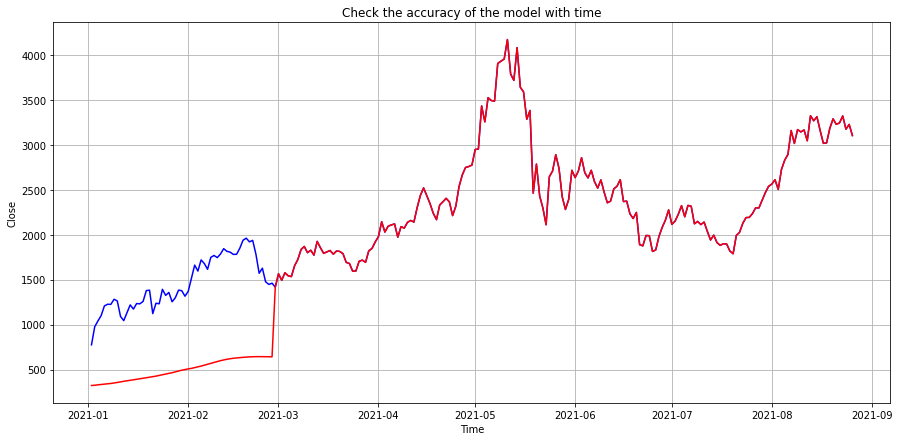

In [95]:
print("Red - Predicted Ethurem Series  ,  Blue - Ethurem Series")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(test_df["Close"], 'b')
plt.plot(pred_df["Close"] , 'r')
plt.xlabel('Time')
plt.ylabel('Close')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

#LSTM to predict the price stock

In [36]:
df = pd.read_csv("ETH-USD.csv",parse_dates=True)


In [37]:
chosen_col = 'Close'


In [38]:
print(len(df))
df.head()

2212


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [39]:
split_row = len(df) - int(0.2 * len(df))
train_data = df.iloc[:split_row]
test_data = df.iloc[split_row:]

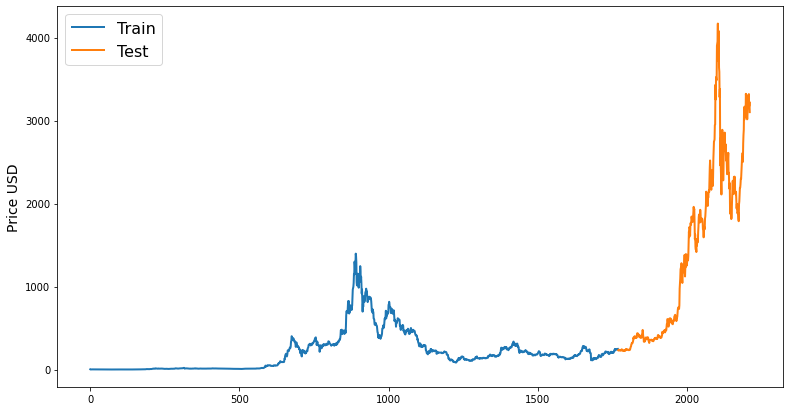

In [40]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train_data[chosen_col], label='Train', linewidth=2)
ax.plot(test_data[chosen_col], label='Test', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [50]:
df.iloc[:, 7:8].values

array([], shape=(2212, 0), dtype=float64)

In [49]:
from sklearn.preprocessing import MinMaxScaler

datacol = df.iloc[:, 7:8].values
print(datacol)
traincol = train_data.iloc[:, 7:8].values
testcol = test_data.iloc[:, 7:8].values

shaped_data = np.reshape(datacol, (-1,1))
train_shaped = np.reshape(traincol, (-1,1))
test_shaped = np.reshape(testcol, (-1,1))

sc = MinMaxScaler(feature_range=(0,1))
sc.fit(shaped_data)

train_scaled_data = sc.transform(train_shaped)
test_scaled_data = sc.transform(test_shaped)

[]


ValueError: ignored

In [ ]:
X = []
y = []
time_steps = 50

for i in range(time_steps, len(train_data)):
    X.append(train_scaled_data[i-time_steps:i,0])
    y.append(train_scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer='adam', loss='mse')

In [45]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
43/43 [==============================] - 3s 41ms/step - loss: nan - val_loss: nan
Epoch 2/100
43/43 [==============================] - 1s 31ms/step - loss: nan - val_loss: nan
Epoch 3/100
43/43 [==============================] - 1s 31ms/step - loss: nan - val_loss: nan
Epoch 4/100
43/43 [==============================] - 1s 30ms/step - loss: nan - val_loss: nan
Epoch 5/100
43/43 [==============================] - 1s 30ms/step - loss: nan - val_loss: nan
Epoch 6/100
43/43 [==============================] - 1s 31ms/step - loss: nan - val_loss: nan
Epoch 7/100
43/43 [==============================] - 1s 30ms/step - loss: nan - val_loss: nan
Epoch 8/100
43/43 [==============================] - 1s 31ms/step - loss: nan - val_loss: nan
Epoch 9/100
43/43 [==============================] - 1s 30ms/step - loss: nan - val_loss: nan
Epoch 10/100
43/43 [==============================] - 1s 30ms/step - loss: nan - val_loss: nan


In [46]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [47]:
from keras.metrics import mean_absolute_error

X_testing = []
y_testing = []

for i in range(time_steps, len(test_data)):
    X_testing.append(test_scaled_data[i-time_steps:i,0])
    y_testing.append(test_scaled_data[i, 0])

X_testing, y_testing = np.array(X_testing), np.array(y_testing)
X_testing = np.reshape(X_testing, (X_testing.shape[0], X_testing.shape[1], 1))

predicted_price = model.predict(X_testing)
inv_price = sc.inverse_transform(predicted_price)
real_price = np.reshape(y_testing, (-1,1))
real_price = sc.inverse_transform(real_price)

NotFittedError: ignored

In [ ]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, label='Real', linewidth=2)
ax.plot(inv_price, label='Pred', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)